In [1]:
#SOLO SE DEBE INSTALAR LA PRIMERA VEZ YA LUEGO SE PUEDEN DEJAR COMO COMENTARIOS

#pip install wordcloud #Instalacion paquete para generar nube de palabras
#pip install pillow #Instalacion libreria manejo de imagenes

In [2]:
#Importacion de Librerias
import pandas as pd #Cargar DataSets
import numpy as np #Manejar arreglos numericos
import matplotlib.pyplot as plt #Generar graficas
import seaborn as sns #Generar graficas
from wordcloud import WordCloud #Generar nubes de palabras
from PIL import Image #Importacion y manejo de imagenes

In [3]:
pd.options.display.max_rows=0 # Configuracion para mostrar todas las filas de un dataset

# IMPORTANDO LOS DATOS

In [4]:
data = pd.read_excel("Informe técnico de vulnerabilidades.xlsx")
#Si lo importa, pero no toma los datos

In [5]:
data.head(3)

,Vector,Privilegio,Dirección IP,Sistema,Puerto,Servicio del puerto,Vulnerabilidad,Remediación - Solución,Plugin Output,CVE (Si aplica),Severidad (Industria),CVSS,"Estado de la vulnerabilidad (Persistente, Remediada, Nueva)"
0,Interno,Con Privilegios / Sin Privilegios,10.250.1.228,SRPP,3389,NaN,SSL Medium Strength Cipher Suites Supported (S...,Reconfigure the affected application if possib...,_x000D_\n Medium Strength Ciphers (> 64-bit a...,CVE-2016-2183,Alto,5.0,Nueva
1,Interno,Con Privilegios / Sin Privilegios,172.27.34.40,SRPP,1433,NaN,SSL Medium Strength Cipher Suites Supported (S...,Reconfigure the affected application if possib...,_x000D_\n Medium Strength Ciphers (> 64-bit a...,CVE-2016-2183,Alto,5.0,Nueva
2,Interno,Con Privilegios / Sin Privilegios,172.27.34.40,SRPP,3389,NaN,SSL Medium Strength Cipher Suites Supported (S...,Reconfigure the affected application if possib...,_x000D_\n Medium Strength Ciphers (> 64-bit a...,CVE-2016-2183,Alto,5.0,Nueva


In [6]:
#EXPLORANDO LOS DATOS
data.columns #Columnas del DataSet

Index(['Vector', 'Privilegio', 'Dirección IP', 'Sistema', 'Puerto',
       'Servicio del puerto', 'Vulnerabilidad', 'Remediación - Solución',
       'Plugin Output', 'CVE (Si aplica)', 'Severidad (Industria)', 'CVSS',
       'Estado de la vulnerabilidad (Persistente, Remediada, Nueva)'],
      dtype='object')

## Eliminando Columnas poco destacadas

In [7]:
data =data.drop(['Plugin Output'], axis=1)
data = data.drop(['Remediación - Solución'], axis=1)
data = data.drop(['Servicio del puerto'], axis=1)

In [8]:
data.head(3)

,Vector,Privilegio,Dirección IP,Sistema,Puerto,Vulnerabilidad,CVE (Si aplica),Severidad (Industria),CVSS,"Estado de la vulnerabilidad (Persistente, Remediada, Nueva)"
0,Interno,Con Privilegios / Sin Privilegios,10.250.1.228,SRPP,3389,SSL Medium Strength Cipher Suites Supported (S...,CVE-2016-2183,Alto,5.0,Nueva
1,Interno,Con Privilegios / Sin Privilegios,172.27.34.40,SRPP,1433,SSL Medium Strength Cipher Suites Supported (S...,CVE-2016-2183,Alto,5.0,Nueva
2,Interno,Con Privilegios / Sin Privilegios,172.27.34.40,SRPP,3389,SSL Medium Strength Cipher Suites Supported (S...,CVE-2016-2183,Alto,5.0,Nueva


In [9]:
data["Vector"].value_counts() #2 categorias
#data["Privilegio"].value_counts()#3 categorias
#data["Dirección IP"].value_counts() #Mostrar las 5 Primeras que son las mas recurrentes, son muchas categorias
#data["Sistema"].value_counts()#3 Categorias
#data["Puerto"].value_counts() #15 categorias aprox
#DEJAR 5 TOP#data["Vulnerabilidad"].value_counts() # Es mejor mostrarlos en una tabla, las descripiones son muy extensas
#data["CVE (Si aplica)"].value_counts() #Varias categorias, revisar si se puede desplegar los datos
#data["Severidad (Industria)"].value_counts()#4 Categorias
#data["CVSS"].value_counts()#15 Categorias Diagrama de barras

Interno    1568
Externo      14
Name: Vector, dtype: int64

--------------

## Seleccionando Registros con severidades Extremo, Alto, y Medio

In [10]:
alto_riesgo = data[(data["Severidad (Industria)"]=="Extremo")|(data["Severidad (Industria)"]=="Alto")|(data["Severidad (Industria)"]=="Medio")]
alto_riesgo.head()

,Vector,Privilegio,Dirección IP,Sistema,Puerto,Vulnerabilidad,CVE (Si aplica),Severidad (Industria),CVSS,"Estado de la vulnerabilidad (Persistente, Remediada, Nueva)"
0,Interno,Con Privilegios / Sin Privilegios,10.250.1.228,SRPP,3389,SSL Medium Strength Cipher Suites Supported (S...,CVE-2016-2183,Alto,5.0,Nueva
1,Interno,Con Privilegios / Sin Privilegios,172.27.34.40,SRPP,1433,SSL Medium Strength Cipher Suites Supported (S...,CVE-2016-2183,Alto,5.0,Nueva
2,Interno,Con Privilegios / Sin Privilegios,172.27.34.40,SRPP,3389,SSL Medium Strength Cipher Suites Supported (S...,CVE-2016-2183,Alto,5.0,Nueva
3,Interno,Con Privilegios / Sin Privilegios,10.250.1.228,SRPP,3389,SSL Certificate Cannot Be Trusted,NaN,Medio,6.4,Nueva
4,Interno,Con Privilegios / Sin Privilegios,10.250.1.228,SRPP,3389,SSL Self-Signed Certificate,NaN,Medio,6.4,Nueva


---------------

## Direcciones IP más recurrentes Por Privilegios

In [11]:
grafica_IP = alto_riesgo[alto_riesgo["Vector"] == "Interno"] #Seleccionando solo el vector interno
grafica_IP = alto_riesgo[["Privilegio", "Dirección IP"]] #Seleccioando las columnas a graficar


#Obteniendo las IP mas recurrentes
unicos = np.unique(grafica_IP["Dirección IP"].astype(str), return_counts=True)
data_unicos = pd.DataFrame(unicos).T
data_unicos.columns=["Variable", "Conteo"]
data_unicos = data_unicos.sort_values(by=["Conteo"], ascending=False)
#data_unicos.head(15) #Muestra los primeros 5 registros obtenidos
#CONCLUSION: las IP internas cuentan con mas criticidad, ya que son las unicas que cuentan con privilegios a diferencias de las externas

#TOP 15 de las mas usadas
top_ip = data_unicos[0:20]["Variable"] # Top 15 Ip a Graficar
#top_ip


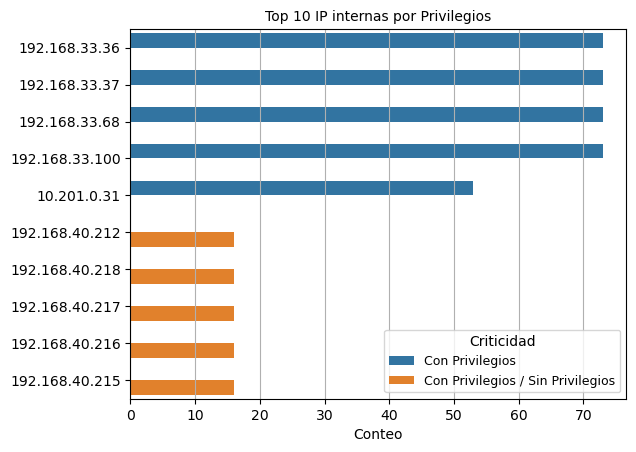

In [12]:
ip_a_seleccionar = top_ip
dataset_top_ip = alto_riesgo[alto_riesgo["Dirección IP"].isin(ip_a_seleccionar)] #Se seleccionan los registros del top15 en ip

#Graficando barras
sns.countplot(y="Dirección IP", data=dataset_top_ip, 
              order = dataset_top_ip["Dirección IP"].value_counts().iloc[0:10].index, hue="Privilegio")
sns.set_palette("Set2")
plt.title("Top 10 IP internas por Privilegios",fontsize="10")
plt.xlabel("Conteo")
plt.ylabel(None)
plt.legend(title="Criticidad", loc="lower right", fontsize="9")
plt.grid(axis="x")
plt.show()

-----------

## Top 10 IP internas por Criticidad

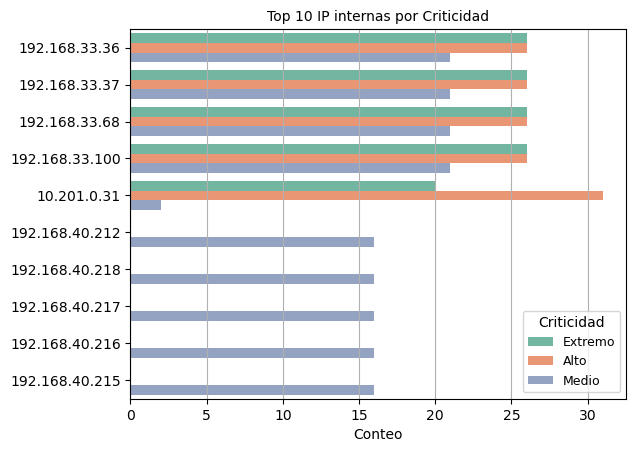

In [13]:
ip_a_seleccionar = top_ip
dataset_top_ip = alto_riesgo[alto_riesgo["Dirección IP"].isin(ip_a_seleccionar)] #Se seleccionan los registros del top15 en ip

#Graficando barras
sns.countplot(y="Dirección IP", data=dataset_top_ip, 
              order = dataset_top_ip["Dirección IP"].value_counts().iloc[0:10].index, hue="Severidad (Industria)")
sns.set_palette("Set2")
plt.title("Top 10 IP internas por Criticidad",fontsize="10")
plt.xlabel("Conteo")
plt.ylabel(None)
plt.legend(title="Criticidad", loc="lower right", fontsize="9")
plt.grid(axis="x")
plt.show()

--------------------

--------------------

## Top 10 IP internas por Sistemas

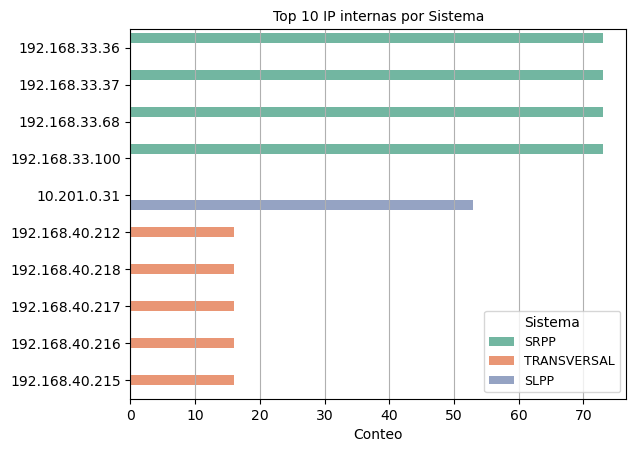

In [14]:
ip_a_seleccionar = top_ip
dataset_top_ip = alto_riesgo[alto_riesgo["Dirección IP"].isin(ip_a_seleccionar)] #Se seleccionan los registros del top15 en ip

#Graficando barras
sns.countplot(y="Dirección IP", data=dataset_top_ip, 
              order = dataset_top_ip["Dirección IP"].value_counts().iloc[0:10].index, hue="Sistema")
sns.set_palette("Set2")
plt.title("Top 10 IP internas por Sistema",fontsize="10")
plt.xlabel("Conteo")
plt.ylabel(None)
plt.legend(title="Sistema", loc="lower right", fontsize="9")
plt.grid(axis="x")
plt.show()

------------

## Vectores por Privilegios

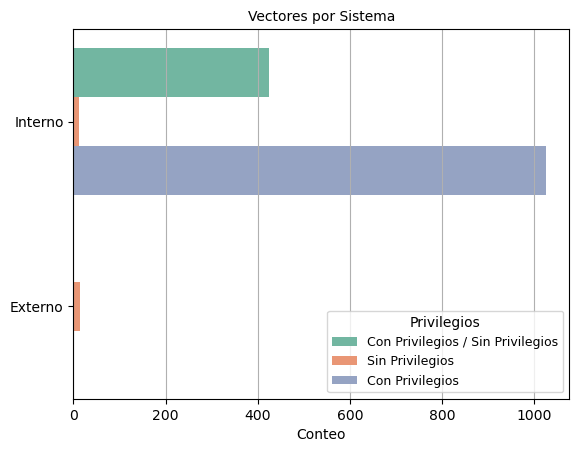

In [15]:
sns.countplot(y="Vector", data=alto_riesgo, 
              order = alto_riesgo["Vector"].value_counts().index, hue="Privilegio")
sns.set_palette("Set2")
plt.title("Vectores por Sistema",fontsize="10")
plt.xlabel("Conteo")
plt.ylabel(None)
plt.legend(title="Privilegios", loc="lower right", fontsize="9")
plt.grid(axis="x")
plt.show()

-----------

---------------

## Vectores por Sistema

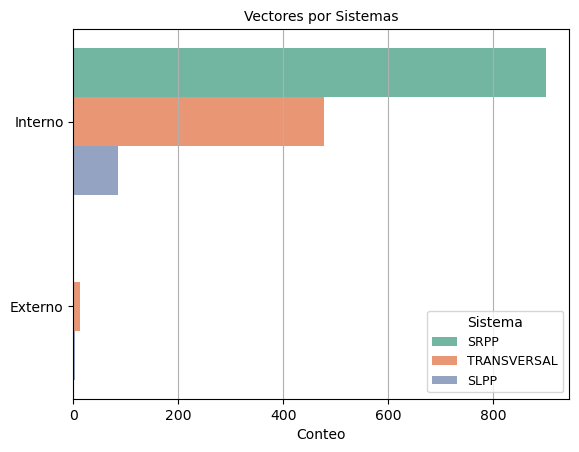

In [16]:
sns.countplot(y="Vector", data=alto_riesgo, 
              order = alto_riesgo["Vector"].value_counts().index, hue="Sistema")
sns.set_palette("Set2")
plt.title("Vectores por Sistemas",fontsize="10")
plt.xlabel("Conteo")
plt.ylabel(None)
plt.legend(title="Sistema", loc="lower right", fontsize="9")
plt.grid(axis="x")
plt.show()

------------

## CVSS por Severidad

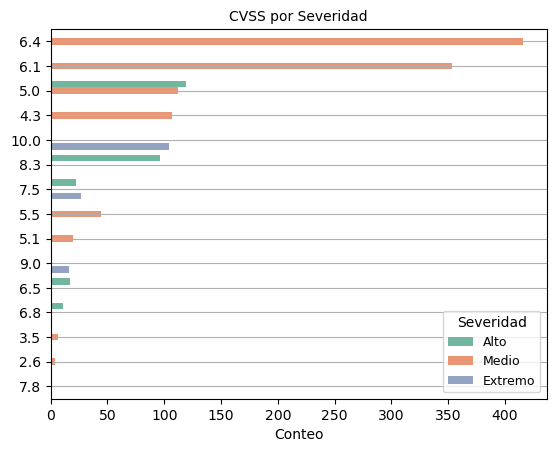

In [17]:
sns.countplot(y="CVSS", data=alto_riesgo, 
              order = alto_riesgo["CVSS"].value_counts().index, hue="Severidad (Industria)")
sns.set_palette("Set2")
plt.title("CVSS por Severidad",fontsize="10")
plt.xlabel("Conteo")
plt.ylabel(None)
plt.legend(title="Severidad", loc="lower right", fontsize="9")
plt.grid(axis="y")
plt.show()

--------------------

## Puertos por Severidad

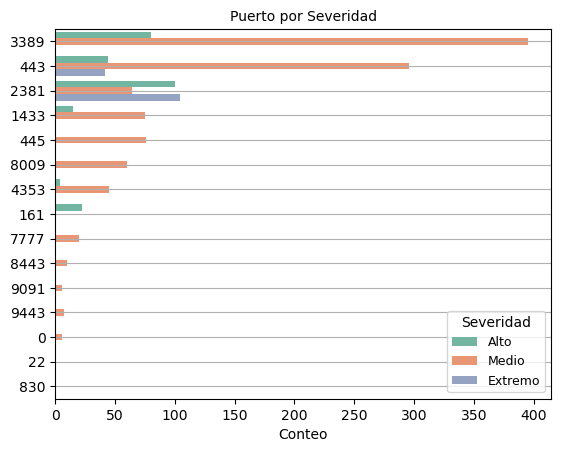

In [18]:
sns.countplot(y="Puerto", data=alto_riesgo, 
              order = alto_riesgo["Puerto"].value_counts().index, hue="Severidad (Industria)")
sns.set_palette("Set2")
plt.title("Puerto por Severidad",fontsize="10")
plt.xlabel("Conteo")
plt.ylabel(None)
plt.legend(title="Severidad", loc="lower right", fontsize="9")
plt.grid(axis="y")
plt.show()

---------

## CVSS vs Puerto

Text(0.5, 1.0, 'CVSS vs Puerto')

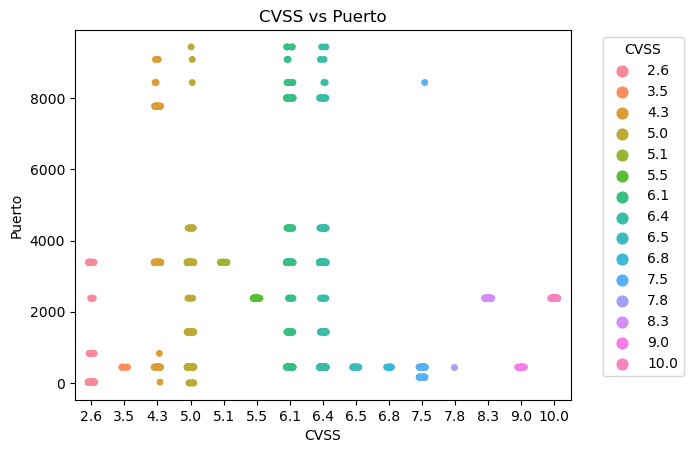

In [19]:
sns.stripplot(y="Puerto", x="CVSS", data=data, hue="CVSS")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',title="CVSS")
plt.title("CVSS vs Puerto")

-----------

## Vulnerabilidades mas incidentes según su Criticidad

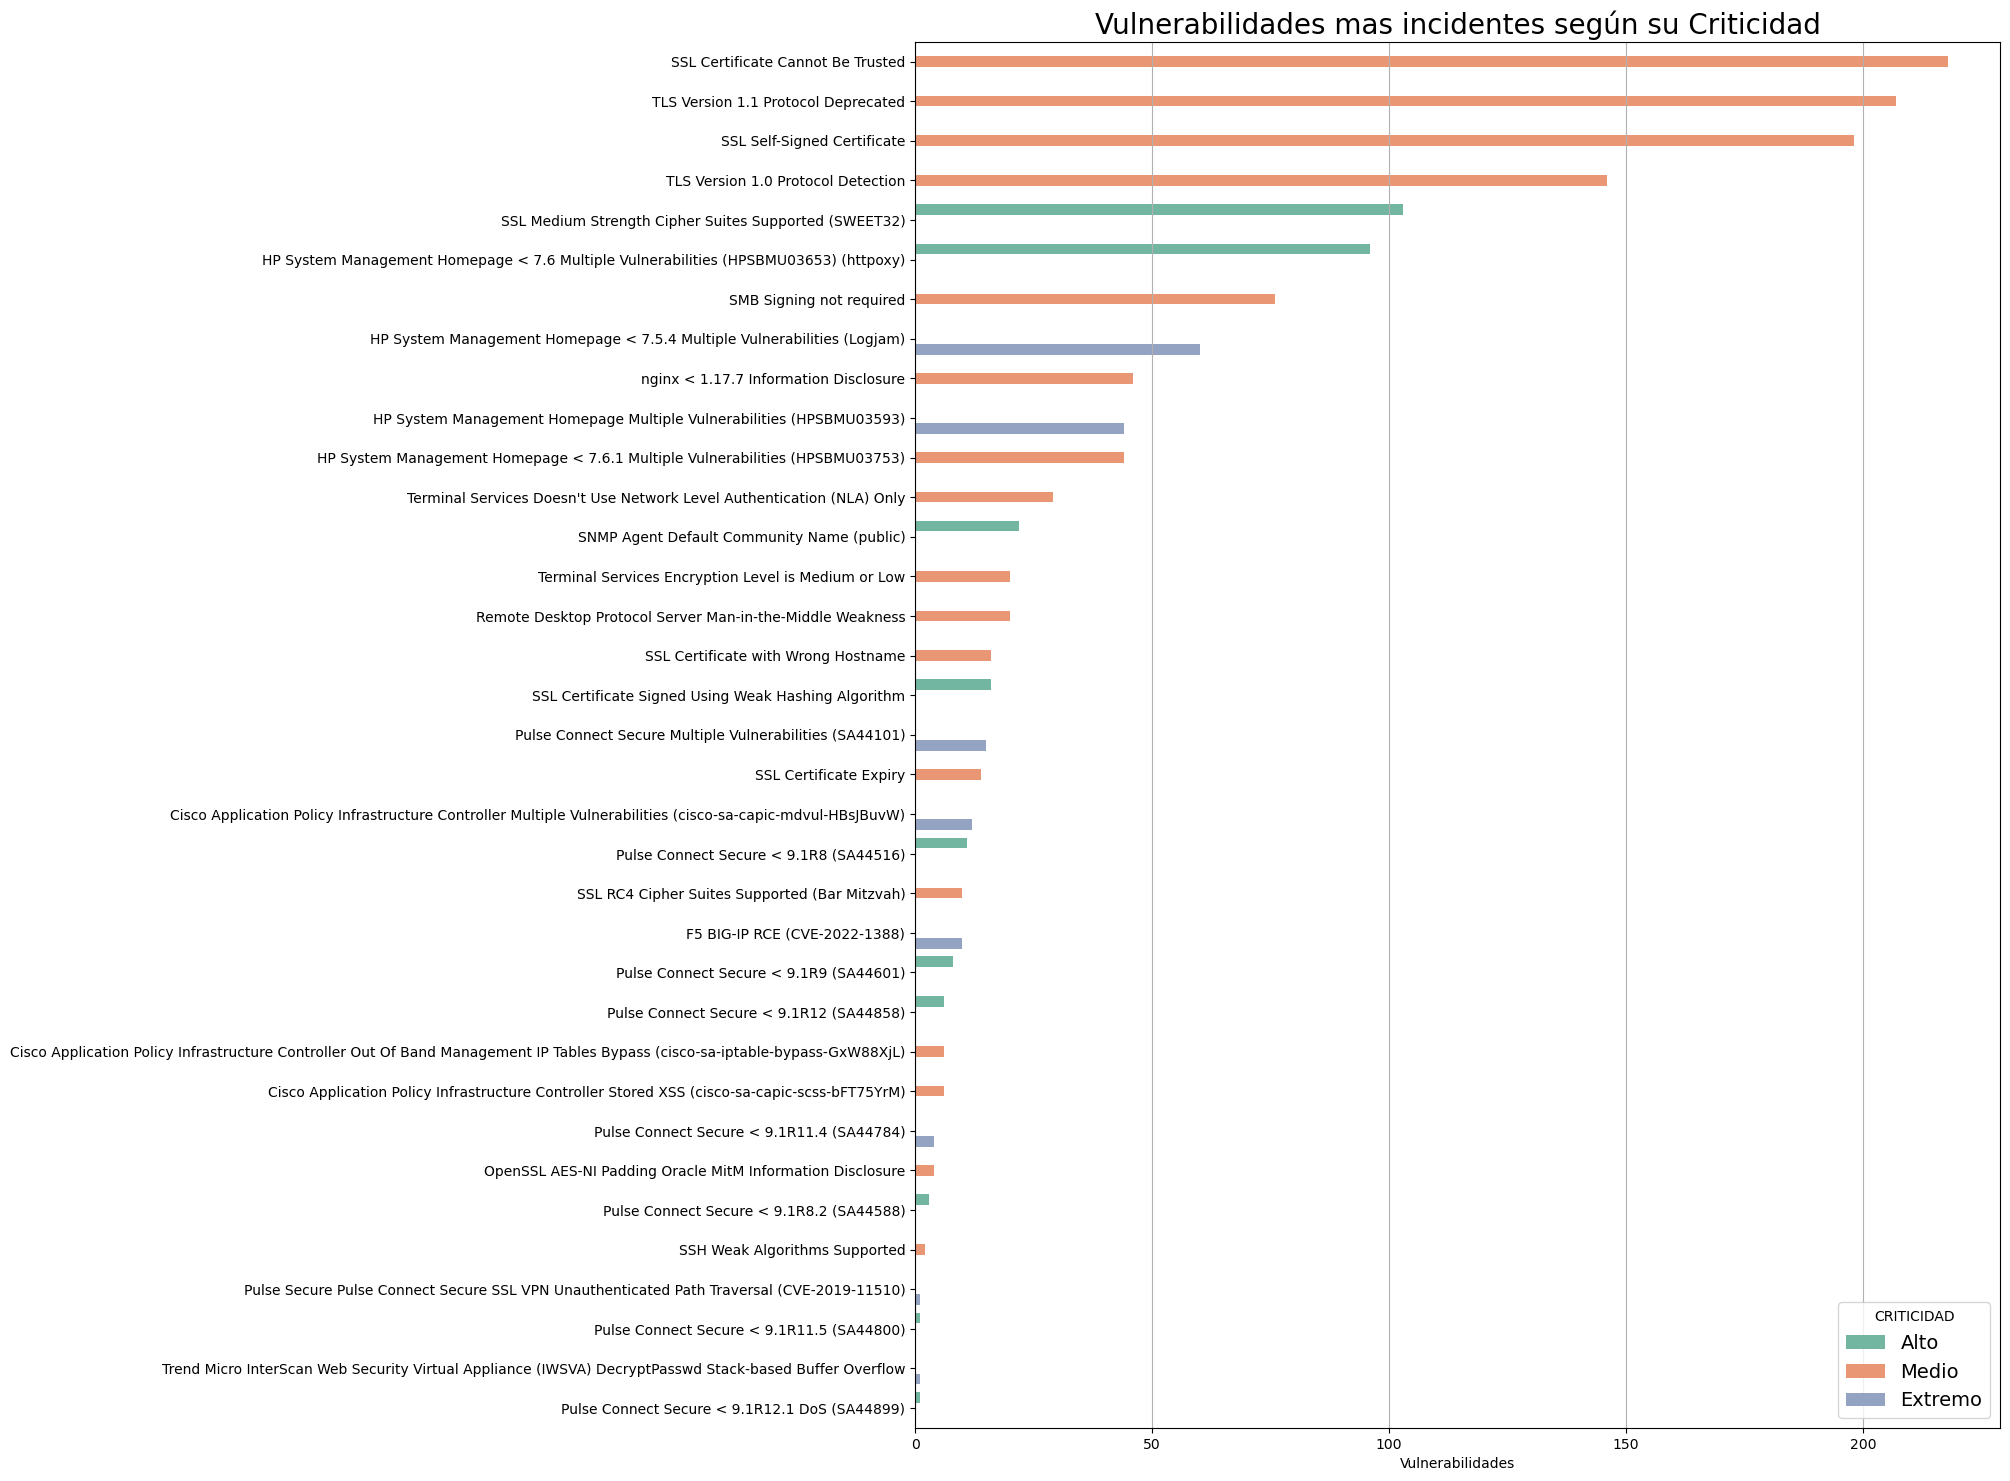

In [20]:
plt.figure(figsize=(14,18))
sns.countplot(y="Vulnerabilidad", data=alto_riesgo, 
              order = alto_riesgo["Vulnerabilidad"].value_counts().index, hue="Severidad (Industria)")
plt.title("Vulnerabilidades mas incidentes según su Criticidad",fontsize="20")
plt.xlabel("Vulnerabilidades")
plt.ylabel(None)
plt.legend(title="CRITICIDAD", loc="lower right", fontsize="14")
plt.grid(axis="x")
plt.show()

------------

## CVE en Criticidad Extrema, Media y Alta

In [21]:
#Obteniendo el conteo y las etiquetas de las variables
unicos = np.unique(alto_riesgo["CVE (Si aplica)"].astype(str), return_counts=True)
data_unicos = pd.DataFrame(unicos).T
data_unicos.columns=["Variable", "Conteo"]
data_unicos = data_unicos.sort_values(by=["Conteo"], ascending=False)
#data_unicos.head() 

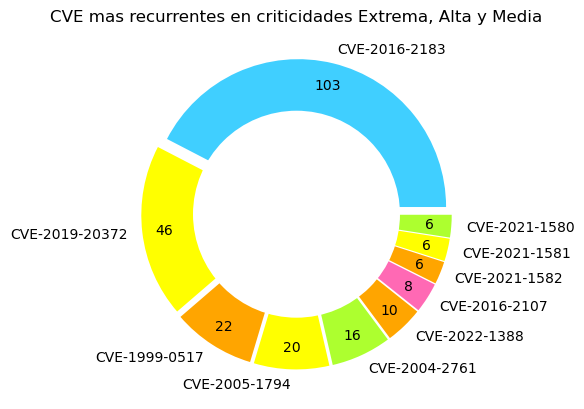

In [22]:
##GRAFICO DE ANILLOS
colors = ['#FF0000', '#40cfff', '#FFFF00','#FFA500',"#FFFF00", 
          '#ADFF2F', '#FFA500', '#ff69b4', "#FFA500", '#FFFF00',
         '#ADFF2F', '#FFA500', '#ff69b4', '#FFFF00', '#FFA500']

explode = (0.05, 0.05, 0.05, 0.05, 0.05,
          0.05, 0.05, 0.05, 0.05, 0.05,
          0.05, 0.05, 0.05, 0.05, 0.05)

frecuencias = data_unicos[1:11]["Conteo"] #Se toma desde el indice 1 para omitir la primera fila con n.a.
etiquetas = data_unicos[1:11]["Variable"] #Se toma desde el indice 1 para omitir la primera fila con n.a.
colors = colors[1:11]
explode = explode[1:11]

#Configuraciones
 
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{next(gen)}"

counts=frecuencias

# Grafico de Pastel
plt.pie(frecuencias, colors=colors, labels=etiquetas,
        autopct=autopct_fun(counts), pctdistance=0.85,
        explode=explode,labeldistance=1.1)
  
# Agregando el circulo Blanco en la Mitad
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('CVE mas recurrentes en criticidades Extrema, Alta y Media')
plt.show()

---------

## Nube de Palabras columna: "Vulnerabilidad"

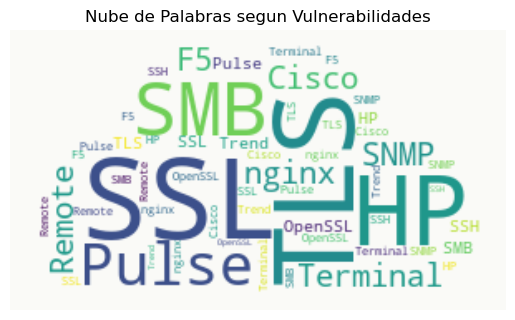

In [27]:
mask = np.array(Image.open("nube de palabras.png"))
mask[mask == 1] = 255

#Texto a Analizar
text = " ".join(item.split()[0] for item in alto_riesgo.Vulnerabilidad)

#Creando la nube
exclure_mots=["System", "Self"] #Palabras a excluir #IMPORTANTE
word_cloud = WordCloud(collocations = False, background_color="#FAFAF7", max_words=50, stopwords = exclure_mots,
                      mask=mask, repeat=True).generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation="bilinear")
plt.title("Nube de Palabras segun Vulnerabilidades")
plt.axis("off")
plt.show()